# Importance Sampling

Importance Sampling is a Monte Carlo technique used to estimate some properties (e.g. the mean or variance) of a target distribution. The main advantage of this technique is that we can estimate such properties of the target distribution without having to sample from that distribution. 

The idea behind Importance Sampling is simple. Let $f(x)$ be the density function of a *target distribution* and $g(x)$ be the density function of a *proposal distribution* from which we know how to sample from. We can compute the expected value of any function $h(x)$ using the following result:

$$\mu = \mathbb{E}_f(h(x)) = \int{h(x)f(x)dx} = \int{h(x)\frac{f(x)}{g(x)}g(x)dx} = \mathbb{E}_g(h(x)\frac{f(x)}{g(x)})$$

Therefore, we are taking expectations with respect to $g(x)$ rather than $f(x)$. We may want to do this in situations in which it is hard or we don't know how to sample from the target distribution. 

Then, if the support of $g(x)$ includes that of $f(x)$, given a random sample $(X_1,...,X_n)$ from $g(x)$, we can approximate the mean using the sample mean:

$$\mu_{IS} = \frac{1}{n} \sum_{i=1}^n h(x_i)\frac{f(x_i)}{g(x_i)}$$

Therefore, the algorithm goes as follows:
1. Draw a sample of size n from $g(x)$
2. Estimate the expected value of a function $h(x)$ as the sample mean of $h(x)$ times the unstandardized importance weights $\frac{f(x)}{g(x)}$

### Example: Mean and Variance of a Beta distribution

Let's now apply these concepts to estimate the mean and the variance of a Beta distribution with parameters $a=10$ and $b=3$, using a $Uniform(0,1)$ as proposal distribution.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial as fact

%matplotlib inline

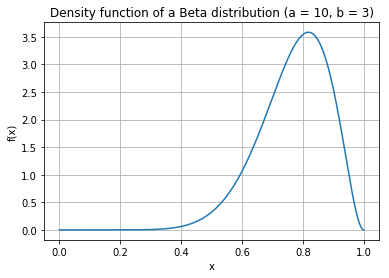

In [4]:
# Since a and b are positive integers, we can use the factorial definition of the Beta function.
def beta(a, b):
    return fact(a - 1) * fact(b - 1) / fact(a + b - 1)

# The p.d.f. of a Beta distribution is then:
def f(x, a, b):
    return (1 / beta(a, b)) * x**(a-1) * (1-x)**(b-1)

# Plot of the density function of a Beta distribution with a = 10 and b = 3
x = np.linspace(0,1,1000)
plt.figure();
plt.plot(x, f(x, a=10, b=3));
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Density function of a Beta distribution (a = 10, b = 3)')
plt.grid();

Let's now define the function *importance_mean()* which computes the mean of the Beta distribution using IS.

In [13]:
def importance_mean(n):
    X = np.random.rand(n)   # Generate random sample from g(x)
    h = []
    for i in range(n):
        h.append(X[i] * f(X[i], a=10, b=3))   # Compute product of h(X) and importance weights
    
    return sum(h) / n

importance_mean(100000)

0.7685845090509674

Let's compare our results with the mean obtained sampling directly from a $Beta(10,3)$

In [14]:
beta_sample = np.random.beta(10,3,100000)
np.mean(beta_sample)

0.7694422145572405

We now use Importance Sampling to compute the variance of the distribution.

In [15]:
def importance_var(n):
    X = np.random.rand(n)
    mean = importance_mean(n)
    h = []
    for i in range(n):
        h.append((X[i] - mean)**2 * f(X[i], a=10, b=3))  # h(X) is now (x - mu)^2
    
    return sum(h) / n

importance_var(100000)

0.012673515242840827

In [16]:
np.var(beta_sample)

0.012598115727315264

As we can see the approximation is good. In fact, the estimator obtained through Importance Sampling is unbiased and converges almost surely to the true value of the estimator.